# Dataset Overview

## Dataset Number

In [18]:
import pickle
import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
%config InlineBackend.figure_format = 'retina'

In [2]:
dataset_info = pd.read_parquet('../Data/Dataset_Info/dataset_info.parquet')
dataset_info

,dataset_name,author,dataset_creation_time,downloads,has_card,has_nonempty_card,task,domain
0,super_glue,huggingface,Tue Jan 25 16:34:18 2022 +0100,1403269.0,True,True,"text-classification,token-classification,quest...",nlp
1,glue,huggingface,Tue Jan 25 16:34:03 2022 +0100,1140355.0,True,True,text-classification,nlp
2,argilla/news-summary,argilla,Wed Dec 7 05:39:38 2022 +0000,1093305.0,True,True,summarization,nlp
3,openwebtext,huggingface,Tue Jan 25 16:34:33 2022 +0100,755450.0,True,True,"text-generation,fill-mask",nlp
4,bigscience/P3,bigscience,Thu Oct 14 03:22:22 2021 +0000,619941.0,True,True,other,None
...,...,...,...,...,...,...,...,...
24060,ana-tamais/dogsnack-premier,ana-tamais,Sun Dec 4 16:49:45 2022 +0000,0.0,True,False,None,None
24061,asaxena1990/NSME-COM,asaxena1990,Thu Aug 18 05:19:29 2022 +0000,0.0,True,True,"question-answering,text-retrieval,text2text-ge...",nlp
24062,chandbla/amazon-shoe-reviews,chandbla,Fri Sep 9 14:36:32 2022 +0000,0.0,False,False,None,None
24063,fffhyyhh666/Mouth-64,fffhyyhh666,Mon Aug 29 14:52:42 2022 +0000,0.0,False,False,None,None


In [3]:
from collections import Counter
len_total = len(dataset_info)
len_dataset_card = len(dataset_info[dataset_info['has_card']==True])
len_dataset_nonempty_card = len(dataset_info[dataset_info['has_nonempty_card']==True])
num_author_total = len(Counter(dataset_info['author']))
num_author_card = len(Counter(dataset_info[dataset_info['has_card']==True]['author']))
num_author_nonempty = len(Counter(dataset_info[dataset_info['has_nonempty_card']==True]['author']))
print('Number of datasets in total:', len_total, end = ', ')
print(f'from {num_author_total} authors')
print('Number of datasets with dataset card:', len_dataset_card, '('+ "{:.1f}".format(len_dataset_card/len_total*100)+'%)', end = ', ')
print(f'from {num_author_card} authors')
print('Number of datasets with non-empty dataset card:', len_dataset_nonempty_card, '('+ "{:.1f}".format(len_dataset_nonempty_card/len_total*100)+'%)', end=', ')
print(f'from {num_author_nonempty} authors')


Number of datasets in total: 24065, from 7811 authors
Number of datasets with dataset card: 14011 (58.2%), from 4782 authors
Number of datasets with non-empty dataset card: 7433 (30.9%), from 1982 authors


In [4]:
def str2time(str):
    time = datetime.datetime.strptime(str, "%a %b %d %H:%M:%S %Y %z").date()
    return time

In [5]:
dataset_info = dataset_info.dropna(subset=['dataset_creation_time'])
dataset_info['dataset_creation_time'] = dataset_info['dataset_creation_time'].apply(lambda x: str2time(x))
dataset_info

,dataset_name,author,dataset_creation_time,downloads,has_card,has_nonempty_card,task,domain
0,super_glue,huggingface,2022-01-25,1403269.0,True,True,"text-classification,token-classification,quest...",nlp
1,glue,huggingface,2022-01-25,1140355.0,True,True,text-classification,nlp
2,argilla/news-summary,argilla,2022-12-07,1093305.0,True,True,summarization,nlp
3,openwebtext,huggingface,2022-01-25,755450.0,True,True,"text-generation,fill-mask",nlp
4,bigscience/P3,bigscience,2021-10-14,619941.0,True,True,other,None
...,...,...,...,...,...,...,...,...
24060,ana-tamais/dogsnack-premier,ana-tamais,2022-12-04,0.0,True,False,None,None
24061,asaxena1990/NSME-COM,asaxena1990,2022-08-18,0.0,True,True,"question-answering,text-retrieval,text2text-ge...",nlp
24062,chandbla/amazon-shoe-reviews,chandbla,2022-09-09,0.0,False,False,None,None
24063,fffhyyhh666/Mouth-64,fffhyyhh666,2022-08-29,0.0,False,False,None,None


In [6]:
min_time = min(dataset_info['dataset_creation_time'])
print('min_time', min_time)
max_time = max(dataset_info['dataset_creation_time'])
print('max_time', max_time)

min_time 2021-02-05
max_time 2023-03-16


In [7]:
dataset_info = dataset_info.sort_values(by=['dataset_creation_time'], ignore_index=True)
dataset_info

,dataset_name,author,dataset_creation_time,downloads,has_card,has_nonempty_card,task,domain
0,piEsposito/squad_20_ptbr,piEsposito,2021-02-05,4.0,False,False,None,None
1,patrickvonplaten/scientific_papers_dummy,patrickvonplaten,2021-02-05,6.0,False,False,None,None
2,NbAiLab/norec_agg,NbAiLab,2021-02-05,193.0,True,True,text-classification,nlp
3,cdminix/mgb1,cdminix,2021-02-05,187.0,False,False,None,None
4,NbAiLab/norwegian_parliament,NbAiLab,2021-02-05,196.0,True,True,text-classification,nlp
...,...,...,...,...,...,...,...,...
24060,RobertLau/decoder_json,RobertLau,2023-03-16,0.0,True,False,None,None
24061,KaraKaraWitch/MyselfAndEveryone,KaraKaraWitch,2023-03-16,0.0,True,False,None,None
24062,Frodoblack1023/guava,Frodoblack1023,2023-03-16,0.0,True,False,None,None
24063,thorin1336/Laurx_Model,thorin1336,2023-03-16,0.0,False,False,None,None


In [8]:
from dateutil.relativedelta import relativedelta

date_list = dataset_info['dataset_creation_time']
time_range = []
min_time = min(date_list)
max_time = max(date_list)
print('min_time:', min_time, 'max_time:', max_time)
time_delta = relativedelta(days=7)
start_time = datetime.datetime(min_time.year, min_time.month, 1).date()
end_time = (datetime.datetime(max_time.year, max_time.month, 1).date())
time_range.append(start_time)

while True:
    start_time += time_delta
    time_range.append(start_time)
    if start_time > end_time:
        break
time_range_str = [i.strftime("%Y-%m-%d") for i in time_range]
dataset_number = []
datasetcard_number = []
for time in time_range:
    dataset_number.append(len(dataset_info[dataset_info['dataset_creation_time'] < time]))
    datasetcard_number.append(len(dataset_info[(dataset_info['dataset_creation_time'] < time) & (dataset_info['has_nonempty_card']==True)]))

min_time: 2021-02-05 max_time: 2023-03-16


In [9]:
time_range_str = [i.strftime("%Y-%m-%d") for i in time_range]
dataset_number = []
datasetcard_number = []
for time in time_range:
    dataset_number.append(len(dataset_info[dataset_info['dataset_creation_time'] < time]))
    datasetcard_number.append(len(dataset_info[(dataset_info['dataset_creation_time'] < time) & (dataset_info['has_nonempty_card']==True)]))

In [10]:
dataset_number_pd = pd.DataFrame(columns=['dataset_time', 'dataset_number', 'dataset_type'])
dataset_number_pd['dataset_time'] = time_range_str
dataset_number_pd['dataset_number'] = dataset_number
dataset_number_pd['dataset_type'] = 'all datasets'
dataset_number_card_pd = pd.DataFrame(columns=['dataset_time', 'dataset_number', 'dataset_type'])
dataset_number_card_pd['dataset_time'] = time_range_str
dataset_number_card_pd['dataset_number'] = datasetcard_number
dataset_number_card_pd['dataset_type'] = 'datasets with non-empty dataset card'
dataset_number_pd = pd.concat([dataset_number_pd, dataset_number_card_pd])
dataset_number_pd

,dataset_time,dataset_number,dataset_type
0,2021-02-01,0,all datasets
1,2021-02-08,22,all datasets
2,2021-02-15,31,all datasets
3,2021-02-22,50,all datasets
4,2021-03-01,57,all datasets
...,...,...,...
105,2023-02-06,6814,datasets with non-empty dataset card
106,2023-02-13,6904,datasets with non-empty dataset card
107,2023-02-20,7010,datasets with non-empty dataset card
108,2023-02-27,7160,datasets with non-empty dataset card


In [11]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

# Linear function
def linear_func(x, a, b):
    return a * x + b

# Filter the data to include only 'All dataset repositories'
all_datasets_data = dataset_number_pd[dataset_number_pd['dataset_type'] == 'all datasets']

# Filter the data to start from 2022-01-24
all_datasets_data = all_datasets_data[all_datasets_data['dataset_time'] > '2022-01-24']

# Exponential function
def exponential(x, a, b):
    return a * np.exp(b * x)

# Fit the exponential curve
x_data = np.arange(len(all_datasets_data))
y_data = all_datasets_data['dataset_number']
popt, _ = curve_fit(exponential, x_data, y_data)

x_data = np.arange(len(all_datasets_data))
y_data = all_datasets_data['dataset_number']
# Fit the linear dataset on the logarithm of y_data
x_data = np.arange(len(y_data))
y_log_data = np.log(y_data)
popt, _ = curve_fit(linear_func, x_data, y_log_data)

# Calculate the fitted values
y_log_fit = linear_func(x_data, *popt)
y_fit = np.exp(y_log_fit)

# Exponential formula
exp_formula = f'y = {np.exp(popt[1]):.2f} * exp({popt[0]:.2f} * x)'

# Print the fitted exponential curve and the exponential formula
print("Fitted exponential curve:", y_fit)
print("Exponential formula:", exp_formula)


Fitted exponential curve: [ 2571.48974881  2673.64128479  2779.85075502  2890.27935952
  3005.09470192  3124.47104387  3248.58956949  3377.63866038
  3511.81418152  3651.31977858  3796.36718696  3947.1765532
  4103.97676907  4267.00581898  4436.5111412   4612.7500034
  4795.98989311  4986.50892371  5184.59625655  5390.5525398
  5604.69036477  5827.33474036  6058.82358635  6299.50824625
  6549.75402055  6809.94072121  7080.46324806  7361.73218822
  7654.17443921  7958.23385691  8274.37192924  8603.06847656
  8944.8223799   9300.1523382   9669.59765552 10053.71905959
 10453.09955285 10868.34529731 11300.08653457 11748.97854232
 12215.70262897 12700.96716766 13205.50867138 13730.09291087
 14275.51607684 14842.60598839 15432.22334947 16045.26305516
 16682.65554997 17345.36823997 18034.4069611  18750.81750581
 19495.68721025 20270.14660467 21075.37112919 21912.58291792
 22783.05265379 23688.1014972 ]
Exponential formula: y = 2571.49 * exp(0.04 * x)


In [12]:
import plotly.graph_objs as go
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

# Filter the data to include only 'All dataset repositories'
all_datasets_data = dataset_number_pd[dataset_number_pd['dataset_type'] == 'all datasets']

# Filter the data to start from 2022-01-24
all_datasets_data = all_datasets_data[all_datasets_data['dataset_time'] > '2022-01-24']

# Linear function
def linear_func(x, a, b):
    return a * x + b

# Fit the linear dataset on the logarithm of y_data
x_data = np.arange(len(all_datasets_data))
y_data = all_datasets_data['dataset_number']
y_log_data = np.log(y_data)
popt, _ = curve_fit(linear_func, x_data, y_log_data)

# Calculate the fitted values
y_log_fit = linear_func(x_data, *popt)
y_fit = np.exp(y_log_fit)

# Exponential formula
exp_formula = f'y = {np.exp(popt[1]):.2f} * exp({popt[0]:.2f} * x)'

# Create the bar plot
fig = go.Figure()

fig.add_trace(go.Bar(
    x=all_datasets_data['dataset_time'],
    y=all_datasets_data['dataset_number'],
    name="All dataset repositories",
))

# update bar color
fig.update_traces(marker_color='#e0effa')

# Add the exponential fit curve
fig.add_trace(go.Scatter(
    x=all_datasets_data['dataset_time'],
    y=y_fit,
    mode='lines',
    name='Exponential Fit',
    line=dict(color='#6378a7', dash='dash'),
))


# Calculate the weekly growth rate and doubling time
growth_rate = (np.exp(popt[0]) - 1) * 100
doubling_time = np.log(2) / popt[0]

# Print the growth rate and doubling time
print(f"Weekly growth rate: {growth_rate:.2f}%")
print(f"Doubling time: {doubling_time:.0f} weeks")

# Add the exponential formula annotation
fig.add_annotation(
    x=0.99,
    y=0.01,
    xref="paper",
    yref="paper",
    text=f"Weekly growth rate: {growth_rate:.2f}%",
    showarrow=False,
    font=dict(size=16, color="#000000"),
    bgcolor="#ffffff",
    opacity=0.8,
)


# Customize the layout
fig.update_layout(
    autosize=False,
    width=600,
    height=450,
    font_size=14,
    font_color="black",
    xaxis_title='',
    yaxis_title='Total Number of Datasets',
    legend_title_text='',
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01, itemsizing='constant'),
)

fig.update_layout(template='plotly_white')

fig.update_layout(
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='#cccccc',
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='#cccccc',
    ),
)
# add the border of the figure as rectangle
fig.update_layout(
    shapes=[
        dict(
            type="rect", xref="paper", yref="paper", x0=0, y0=0, x1=1, y1=1,
            line=dict(color="#cccccc", width=1),
        )
    ]
)
fig.update_yaxes(title_standoff=2)

fig.update_layout(width=600, height=450)

fig.show()

# import plotly.io as pio

# # Save the figure with a high resolution (dpi=300)
# pio.write_image(fig, 'Fig1_exp.jpeg', width=600, height=450, scale=10)


Weekly growth rate: 3.97%
Doubling time: 18 weeks


## Dataset Downloads Inequality

In [13]:
dataset_info = dataset_info.sort_values(by=['downloads'], ascending=False, ignore_index=True)

In [14]:
dataset_info['rank'] = np.arange(len(dataset_info)) + 1
dataset_info['downloads_percentage'] = dataset_info.downloads.cumsum() / dataset_info.downloads.sum()
dataset_info['log(rank)'] = np.log10(dataset_info['rank'])
dataset_info['log(downloads)'] = np.log10(dataset_info.downloads + 1)

In [15]:
dataset_info

,dataset_name,author,dataset_creation_time,downloads,has_card,has_nonempty_card,task,domain,rank,downloads_percentage,log(rank),log(downloads)
0,super_glue,huggingface,2022-01-25,1403269.0,True,True,"text-classification,token-classification,quest...",nlp,1,0.102410,0.000000,6.147141
1,glue,huggingface,2022-01-25,1140355.0,True,True,text-classification,nlp,2,0.185633,0.301030,6.057040
2,argilla/news-summary,argilla,2022-12-07,1093305.0,True,True,summarization,nlp,3,0.265422,0.477121,6.038742
3,openwebtext,huggingface,2022-01-25,755450.0,True,True,"text-generation,fill-mask",nlp,4,0.320554,0.602060,5.878206
4,bigscience/P3,bigscience,2021-10-14,619941.0,True,True,other,None,5,0.365798,0.698970,5.792351
...,...,...,...,...,...,...,...,...,...,...,...,...
24060,marcus2000/filthered_nli-500,marcus2000,2022-10-09,0.0,False,False,None,None,24061,1.000000,4.381314,0.000000
24061,autoevaluate/autoeval-eval-multi_nli-default-e...,autoevaluate,2022-10-09,0.0,False,False,None,None,24062,1.000000,4.381332,0.000000
24062,KarelDO/CEBaB_train_confounding_food_service_p...,KarelDO,2022-10-09,0.0,False,False,None,None,24063,1.000000,4.381350,0.000000
24063,Neutra/e621-gay-170k,Neutra,2022-10-09,0.0,True,False,None,None,24064,1.000000,4.381368,0.000000


In [16]:
import plotly.express as px
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import plotly.graph_objs as go

def power_law(x, a, b):
    return a * x**(-b)

test_data = dataset_info[dataset_info['log(downloads)']>0]
fig = px.scatter(
    test_data,
    x='log(rank)',
    y='log(downloads)',
    color='has_nonempty_card',
    labels={'x': 'log10(Rank)', 'y': 'log10(dataset_downloads)'},
    
)

# # update the size of the scatter plot
fig.update_traces(marker=dict(symbol='circle-open', size=5,line=dict(width=1)))

# find the point where the downloads_percentage > 0.8 and annotate it
for i in range(len(dataset_info)):
    if dataset_info.loc[i, 'downloads_percentage'] > 0.8:
        rank = dataset_info.loc[i, 'rank']
        downloads_percentage = dataset_info.loc[i, 'downloads_percentage']
        break

# add the annotation '80% of models downloads are in the top 80 models out of 75k models', in two lines
fig.add_annotation(
    x=dataset_info.loc[i, 'log(rank)'],
    y=dataset_info.loc[i, 'log(downloads)'],
    text=f"""The {rank} datasets with the most downloads<br>account for 80% of the total downloads.""",
    showarrow=True,
    arrowhead=3,
    ax=0,
    ay=60,
    borderpad=4,
    arrowsize=2,
    bgcolor="#ffffff",
    opacity=0.8
)
# fig.update_layout(template='plotly_white')

# move legend to other place
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99
))

# update legend title
fig.update_layout(legend_title_text='')

# update legend text
fig.for_each_trace(
    lambda trace: trace.update(name=trace.name.replace("True", "Dataset w/ dataset card"))
)
fig.for_each_trace(
    lambda trace: trace.update(name=trace.name.replace("False", "Dataset w/o dataset card"))
)


rank = np.log10(test_data['rank'])
log_downloads = np.log10(test_data['downloads'])

test_rank = np.log10(test_data['rank'][25:])
test_log_downloads = np.log10(test_data['downloads'][25:])

popt, pcov = curve_fit(power_law, 10**test_rank, 10**test_log_downloads)

x_fit = np.linspace(np.min(rank), np.max(rank), 100)
y_fit = power_law(10**x_fit, *popt)
# fig.add_scatter(x=x_fit, y=np.log10(y_fit), mode='lines', name='Power law fit')
fig.add_trace(go.Scatter(
    x=x_fit, y=np.log10(y_fit), mode='lines', name='Power law fit',
    line=dict(color='black', width=2, dash='dash')
))
fig.update_layout(template='plotly_white')

# # add grid of the background
fig.update_layout(
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='#cccccc',
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='#cccccc',
    ),
)
# add the border of the figure as rectangle
fig.update_layout(
    shapes=[
        dict(
            type="rect", xref="paper", yref="paper", x0=0, y0=0, x1=1,y1=1,
            line=dict(color="#cccccc", width=1),
        )
    ]
)

# remove figure title
fig.update_layout(title=dict(text=""))

# update x and y axis title
fig.update_xaxes(title_text='Dataset Downloads Rank')
fig.update_yaxes(title_text='Downloads')

# change font size
fig.update_layout(font_size=16)

# let font darker
fig.update_layout(font_color="black")
layout = go.Layout(
    xaxis=dict(
        tickvals=[0, 1, 2, 3, 4],
        ticktext=[r'$10^0$', r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'],
    ),
    yaxis=dict(
        tickvals=[0, 1, 2, 3, 4, 5, 6, 7],
        ticktext=[r'$10^0$', r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$'],
    )
)

# change y ticks' position to be a bit lefter
fig.update_yaxes(tickfont=dict(color='black', size=16), ticks='outside', tickangle=0, ticklen=5, tickwidth=1, tickcolor='#ffffff')
# change y label's position to be a bit righter
fig.update_yaxes(title_standoff=2)
fig.update_xaxes(title_standoff=2)

# update the color of axis grid line color
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#cccccc')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#cccccc')

fig.update_layout(layout)

fig.update_layout(width=600, height=450)
fig.show()

# import plotly.io as pio

# # Save the figure with a high resolution (dpi=300)
# pio.write_image(fig, 'Figure_downloads.jpeg', width=600, height=450, scale=5)

## Dataset Adoption and Downloads Traffic

In [17]:
downloads_sum = sum(dataset_info.downloads)
downloads_nonempty_card = sum(dataset_info[dataset_info['has_nonempty_card']==True]['downloads'])
print('Total Downloads:', downloads_sum)
print('Downloads of datasets with non-empty cards:', downloads_nonempty_card)
print('Percentage of downloads of datasets with non-empty cards/total downloads:{:.1f}%'.format(downloads_nonempty_card/downloads_sum*100))

Total Downloads: 13702442.0
Downloads of datasets with non-empty cards: 13012834.0
Percentage of downloads of datasets with non-empty cards/total downloads:95.0%


In [19]:
def plot_bar_chart(values, labels, colors, ylabel):
    sns.set(style="whitegrid")
    plt.figure(figsize=(4.2, 2.6))
    
    bars = plt.bar(labels, values, color=colors, alpha=0.8)
    plt.ylabel(ylabel, fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.annotate(f'{values[i]:,.0f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=14)

    plt.show()

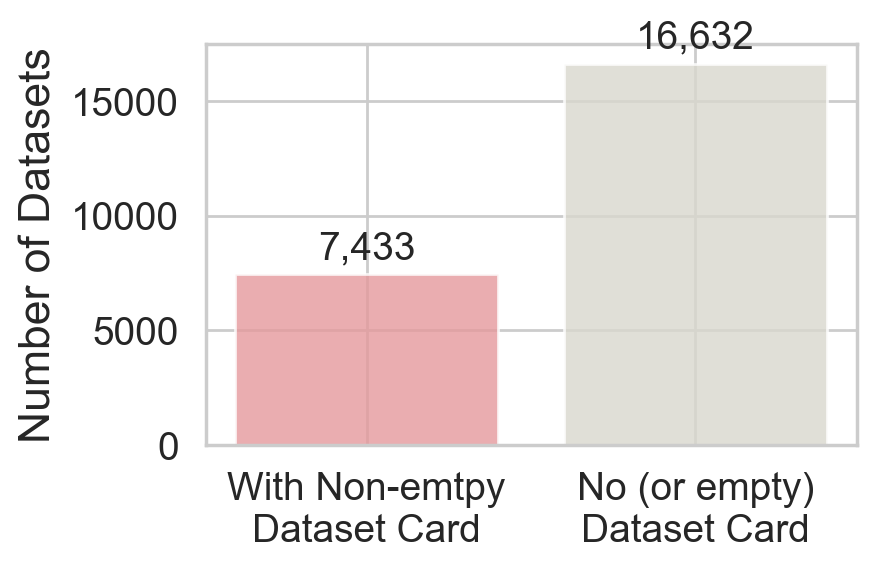

In [20]:
values = [len_dataset_nonempty_card, len_total-len_dataset_nonempty_card]
labels = ['With Non-emtpy\nDataset Card', 'No (or empty)\nDataset Card']
colors = ['#e5999c', '#D9D8CE']
ylabel = 'Number of Datasets'
plot_bar_chart(values, labels, colors, ylabel)


In [21]:
def plot_bar_chart(values, labels, colors, ylabel):
    sns.set(style="whitegrid")
    plt.figure(figsize=(4, 2.2))
    
    bars = plt.bar(labels, values, color=colors, alpha=0.8)
    plt.ylabel(ylabel, fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(0, 1)

    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.annotate(f'{values[i]*100:.1f}%',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=14)

    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
    plt.show()

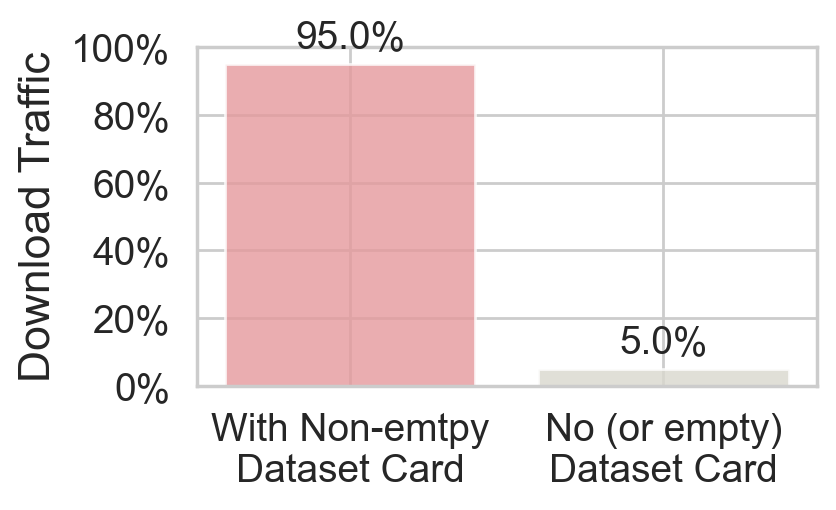

In [22]:
# Bar chart data
values = [downloads_nonempty_card/downloads_sum, 1 - downloads_nonempty_card/downloads_sum]
labels = ['With Non-emtpy\nDataset Card', 'No (or empty)\nDataset Card']
colors = ['#e5999c', '#D9D8CE']
ylabel = 'Download Traffic'
plot_bar_chart(values, labels, colors, ylabel)
